Primeramnte montaremos nuestro dataset ubicado en nuestra carpeta "mis_archivos"





In [637]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Definimos la ruta del dataset y usando pandas


In [638]:
import pandas as pd

# ruta del dataset
dataset_path = '/content/drive/MyDrive/mis_archivos/age_predictions_cleaned.csv'

# Cargar el dataset
df = pd.read_csv(dataset_path)

# Verificar los primeros datos del dataset
print(df.head())


   PAQ605    BMXBMI  LBXGLU  LBXGLT  LBXIN  age_group
0     2.0  1.393867   110.0   150.0  14.91          0
1     2.0  1.099498    89.0    80.0   3.85          0
2     2.0  0.629968    89.0    68.0   6.14          0
3     2.0  0.292901   104.0    84.0  16.15          0
4     1.0  1.426249   103.0    81.0  10.92          0


Comprobamos valores faltantes


In [639]:
# número de valores faltantes por columna
print(df.isnull().sum())

# vemos si hay algún valor faltante en todo el dataset
print(df.isnull().any().any())


PAQ605       0
BMXBMI       0
LBXGLU       0
LBXGLT       0
LBXIN        0
age_group    0
dtype: int64
False


0 valores faltantes

In [640]:
# Identificamos variables categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Variables categóricas:")
print(categorical_columns)


Variables categóricas:
Index([], dtype='object')


Verificamos si nuestros datos estan normalizados (revisamos la: Media y la Desviación Estándar)


Fórmula de normalización

Verificamos los datos normalizados


In [641]:
print(df.columns)


Index(['PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'age_group'], dtype='object')


In [642]:
#valores atipicos

import pandas as pd

columnas = ['PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'age_group']

for columna in columnas:
    # Calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)

    # Calcular el rango intercuartil (IQR)
    IQR = Q3 - Q1

    # Definir los límites para detectar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Encontrar valores atípicos
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]

    # Mostrar los valores atípicos y el número de ellos
    print(f"Valores atípicos en {columna}:")
    print(outliers)
    print(f"Número de valores atípicos en {columna}: {outliers.shape[0]}")
    print()


Valores atípicos en PAQ605:
        PAQ605    BMXBMI      LBXGLU      LBXGLT      LBXIN  age_group
4     1.000000  1.426249  103.000000   81.000000  10.920000          0
9     1.000000  0.292901   90.000000   95.000000   3.240000          0
11    1.000000  0.033850   85.000000   91.000000   9.860000          0
14    1.000000  0.808066  114.000000  150.000000  10.090000          1
21    1.000000  1.701490  105.000000   72.000000  15.980000          0
...        ...       ...         ...         ...        ...        ...
3494  1.551147  0.560300  100.346559   54.897706   6.855034          1
3503  1.387393  0.384942  103.099141  148.162178  18.609071          1
3508  1.138258  0.523120   97.861742  143.276515   6.385625          1
3516  1.110348  0.814980   91.668956  108.331044   5.622280          1
3519  1.027420  0.616286  102.219362  164.917739  20.862093          1

[605 rows x 6 columns]
Número de valores atípicos en PAQ605: 605

Valores atípicos en BMXBMI:
      PAQ605    BMXBMI   

In [643]:

# Copia
df_clean = df.copy()

# columnas a procesar
columnas = ['PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'age_group']

for columna in columnas:
    # calcular Q1 (primer cuartil) y Q3 (tercer cuartil)
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)

    # calcular el rango intercuartil (IQR)
    IQR = Q3 - Q1

    # definir los límites para detectar valores atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # filtrar el DataFrame para eliminar los valores atípicos
    df_clean = df_clean[(df_clean[columna] >= lower_bound) & (df_clean[columna] <= upper_bound)]


print("DataFrame limpio después de eliminar los valores atípicos:")
print(df_clean)


DataFrame limpio después de eliminar los valores atípicos:
      PAQ605    BMXBMI      LBXGLU      LBXGLT      LBXIN  age_group
0        2.0  1.393867  110.000000  150.000000  14.910000          0
1        2.0  1.099498   89.000000   80.000000   3.850000          0
2        2.0  0.629968   89.000000   68.000000   6.140000          0
3        2.0  0.292901  104.000000   84.000000  16.150000          0
5        2.0  0.565206  110.000000  100.000000   6.080000          0
...      ...       ...         ...         ...        ...        ...
3517     2.0  0.225154  109.963071  105.950761   5.224519          1
3518     2.0  0.557655   95.370052   80.629948   4.039809          1
3520     2.0  0.233323   95.785948   80.607026   4.404918          1
3521     2.0  0.855922   94.000000  137.370937  13.323040          1
3523     2.0  0.130003   88.165628  107.000000   3.637186          1

[2613 rows x 6 columns]


In [644]:
print(df_clean.describe())


       PAQ605       BMXBMI       LBXGLU       LBXGLT        LBXIN    age_group
count  2613.0  2613.000000  2613.000000  2613.000000  2613.000000  2613.000000
mean      2.0     0.657542    97.396567   113.496332     8.773034     0.521240
std       0.0     0.439886     8.652819    31.817581     4.675058     0.499644
min       2.0     0.001468    74.000000    41.000000     0.140000     0.000000
25%       2.0     0.299279    91.324700    91.000000     5.040000     0.000000
50%       2.0     0.584333    97.000000   108.393679     7.758289     1.000000
75%       2.0     0.940528   103.000000   133.000000    11.696040     1.000000
max       2.0     1.985853   122.058817   204.000000    23.830000     1.000000


In [645]:
print("Nro de filas en el DataFrame original:", df.shape[0])
print("Nro de filas en el DataFrame limpio:", df_clean.shape[0])


Nro de filas en el DataFrame original: 3524
Nro de filas en el DataFrame limpio: 2613


In [646]:

print(df.columns)


Index(['PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN', 'age_group'], dtype='object')


In [647]:

print(df.head())


   PAQ605    BMXBMI  LBXGLU  LBXGLT  LBXIN  age_group
0     2.0  1.393867   110.0   150.0  14.91          0
1     2.0  1.099498    89.0    80.0   3.85          0
2     2.0  0.629968    89.0    68.0   6.14          0
3     2.0  0.292901   104.0    84.0  16.15          0
4     1.0  1.426249   103.0    81.0  10.92          0


In [648]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [649]:
import pandas as pd #Manipulacion y analisis de datos
#sklearn, para tareas de aprendizaje automatico
#utilizamos la funcion train_test_split del modulo model_selection
#Esta funcion se utiliza para dividir un conjunto de datos
# en dos subconjuntos, uno para entrenamiento y otro para prueba
from sklearn.model_selection import train_test_split
#Importamos la funcion LabelEncoder del modulo preprocessing
#Se utiliza para codificar etiquetas categoricas en forma numerica
from sklearn.preprocessing import LabelEncoder

In [650]:
file_path = '/content/drive/MyDrive/mis_archivos/age_predictions_cleaned.csv'
#Carga de dataset
data = pd.read_csv(file_path, delimiter=',')

In [651]:
display(data)

,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN,age_group
0,2.00000,1.393867,110.000000,150.000000,14.910000,0
1,2.00000,1.099498,89.000000,80.000000,3.850000,0
2,2.00000,0.629968,89.000000,68.000000,6.140000,0
3,2.00000,0.292901,104.000000,84.000000,16.150000,0
4,1.00000,1.426249,103.000000,81.000000,10.920000,0
...,...,...,...,...,...,...
3519,1.02742,0.616286,102.219362,164.917739,20.862093,1
3520,2.00000,0.233323,95.785948,80.607026,4.404918,1
3521,2.00000,0.855922,94.000000,137.370937,13.323040,1
3522,2.00000,1.182898,117.464956,150.116814,26.663496,1


In [652]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3524 entries, 0 to 3523
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PAQ605     3524 non-null   float64
 1   BMXBMI     3524 non-null   float64
 2   LBXGLU     3524 non-null   float64
 3   LBXGLT     3524 non-null   float64
 4   LBXIN      3524 non-null   float64
 5   age_group  3524 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.3 KB


In [653]:
display(data)

,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN,age_group
0,2.00000,1.393867,110.000000,150.000000,14.910000,0
1,2.00000,1.099498,89.000000,80.000000,3.850000,0
2,2.00000,0.629968,89.000000,68.000000,6.140000,0
3,2.00000,0.292901,104.000000,84.000000,16.150000,0
4,1.00000,1.426249,103.000000,81.000000,10.920000,0
...,...,...,...,...,...,...
3519,1.02742,0.616286,102.219362,164.917739,20.862093,1
3520,2.00000,0.233323,95.785948,80.607026,4.404918,1
3521,2.00000,0.855922,94.000000,137.370937,13.323040,1
3522,2.00000,1.182898,117.464956,150.116814,26.663496,1


In [654]:
# : todas las columnas excepto la última para X
X = data.iloc[:, :-1]

# seleccionamos la última columna para y
y = data.iloc[:, -1]

# Verificar el tamaño de y
# m = y.size

In [655]:
print(X)
print('-'*40)
print(y)

       PAQ605    BMXBMI      LBXGLU      LBXGLT      LBXIN
0     2.00000  1.393867  110.000000  150.000000  14.910000
1     2.00000  1.099498   89.000000   80.000000   3.850000
2     2.00000  0.629968   89.000000   68.000000   6.140000
3     2.00000  0.292901  104.000000   84.000000  16.150000
4     1.00000  1.426249  103.000000   81.000000  10.920000
...       ...       ...         ...         ...        ...
3519  1.02742  0.616286  102.219362  164.917739  20.862093
3520  2.00000  0.233323   95.785948   80.607026   4.404918
3521  2.00000  0.855922   94.000000  137.370937  13.323040
3522  2.00000  1.182898  117.464956  150.116814  26.663496
3523  2.00000  0.130003   88.165628  107.000000   3.637186

[3524 rows x 5 columns]
----------------------------------------
0       0
1       0
2       0
3       0
4       0
       ..
3519    1
3520    1
3521    1
3522    1
3523    1
Name: age_group, Length: 3524, dtype: int64


División de los datos en datos de entrenamiento y prueba (80% de los datos para entrenar y el 20% para probar)

In [656]:
# Funcion train_test_split, que recibe X y y, test_size es el tamaño de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [657]:
print("Datos entrenamiento> ")
print(X_train)
print('-'*40)
print(y_train)

Datos entrenamiento> 
        PAQ605    BMXBMI      LBXGLU      LBXGLT      LBXIN
352   2.000000  0.889019   98.000000   68.000000   2.970000
3014  1.877138  0.513570   93.754277   99.245723   5.489596
1312  2.000000  0.001468   92.000000  106.000000   9.060000
1998  2.000000  0.241392   84.000000  123.000000   8.710000
1334  2.000000  0.775685  104.000000   90.000000   8.730000
...        ...       ...         ...         ...        ...
1921  2.000000  1.911969  101.000000  135.000000   6.610000
709   2.000000  0.516634   88.000000   99.000000  13.850000
2487  2.000000  0.303868   99.988618  181.609106   9.332130
174   1.000000  0.306155   92.000000  106.000000   8.810000
1146  2.000000  0.454808  105.000000   98.000000  13.240000

[2819 rows x 5 columns]
----------------------------------------
352     0
3014    1
1312    1
1998    0
1334    0
       ..
1921    0
709     0
2487    1
174     0
1146    0
Name: age_group, Length: 2819, dtype: int64


In [658]:
print("Datos prueba> ")
print(X_test)
print('-'*40)
print(y_test)

Datos prueba> 
       PAQ605    BMXBMI      LBXGLU      LBXGLT      LBXIN
2354  1.26873  0.603729  117.462540  129.118890   6.997654
2449  2.00000  0.594175  100.000000   98.684178   2.926518
1033  2.00000  0.597587   96.000000  122.000000   8.490000
1967  2.00000  0.905210   98.000000  155.000000   4.860000
2850  2.00000  0.070462   95.291012  137.860674   6.381450
...       ...       ...         ...         ...        ...
1683  2.00000  0.241392   95.000000  109.000000   4.550000
1370  1.00000  1.393867  116.000000  156.000000  13.220000
1877  1.00000  0.743303   97.000000  140.000000   5.270000
92    1.00000  0.111866   94.000000  110.000000   7.340000
2703  2.00000  1.488424   89.940942  110.764764   6.360710

[705 rows x 5 columns]
----------------------------------------
2354    1
2449    1
1033    0
1967    0
2850    1
       ..
1683    1
1370    1
1877    1
92      1
2703    1
Name: age_group, Length: 705, dtype: int64


In [659]:
def  featureNormalize(X):
  #copy de X para evitar modificar el original
    X_norm = X_train.copy()
    # inicialización de medias y desviaciones estándar
    mu = np.zeros(X_train.shape[1])
    sigma = np.zeros(X_train.shape[1])
# cálculo de la media y desviación estándar para cada característica
    mu = np.mean(X_train, axis = 0)
    sigma = np.std(X_train, axis = 0)
    # normalización de las características
    X_norm = (X_train - mu) / sigma

    return X_norm, mu, sigma

In [660]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X_train)

print('Media calculada:\n',mu)
print('Desviación estandar calculada:\n',sigma)
print('Matriz con valores normalizados:\n',X_norm)

Media calculada:
 PAQ605      1.859346
BMXBMI      0.723886
LBXGLU     98.864811
LBXGLT    115.959728
LBXIN       9.922640
dtype: float64
Desviación estandar calculada:
 PAQ605     0.333096
BMXBMI     0.570081
LBXGLU    10.098419
LBXGLT    35.385089
LBXIN      6.326273
dtype: float64
Matriz con valores normalizados:
         PAQ605    BMXBMI    LBXGLU    LBXGLT     LBXIN
352   0.422265  0.289667 -0.085638 -1.355365 -1.099010
3014  0.053417 -0.368922 -0.506073 -0.472346 -0.700735
1312  0.422265 -1.267218 -0.679791 -0.281467 -0.136358
1998  0.422265 -0.846360 -1.471994  0.198962 -0.191683
1334  0.422265  0.090862  0.508514 -0.733635 -0.188522
...        ...       ...       ...       ...       ...
1921  0.422265  2.084060  0.211438  0.538087 -0.523632
709   0.422265 -0.363548 -1.075892 -0.479290  0.620802
2487  0.422265 -0.736768  0.111285  1.855284 -0.093342
174  -2.579877 -0.732757 -0.679791 -0.281467 -0.175876
1146  0.422265 -0.472000  0.607540 -0.507551  0.524378

[2819 rows x 5 colum

In [661]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)
    #creamos un arreglo de ceros en g, de la misma cantidad de z
    g = np.zeros(z.shape)
    #calcula la funcion sigmoideal
    g = 1 / (1 + np.exp(-z))   #e^(-z)

    return g

In [662]:
# Prueba la implementacion de la funcion sigmoid
z = 0
g = sigmoid(z)

print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [663]:
#imprimimos X_train
print("Forma de X_train:", X_train.shape)


Forma de X_train: (2819, 5)


In [664]:
# Configurar la matriz adecuadamente, y agregar una columna de unos
m = X_train.shape[0]
X_train = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [665]:
#imprimimos X_train
print("Forma de X_train:", X_train.shape)

Forma de X_train: (2819, 6)


In [666]:
print("Primeras filas de X_train:")
print(X_train[:5])  # Muestra las primeras 5 filas del arreglo


Primeras filas de X_train:
[[ 1.          0.42226462  0.28966706 -0.08563829 -1.35536545 -1.09901037]
 [ 1.          0.05341678 -0.36892233 -0.50607273 -0.47234597 -0.70073547]
 [ 1.          0.42226462 -1.26721827 -0.6797907  -0.28146679 -0.13635825]
 [ 1.          0.42226462 -0.84635958 -1.47199391  0.19896156 -0.19168309]
 [ 1.          0.42226462  0.0908624   0.50851412 -0.73363465 -0.18852167]]


In [667]:
def calcularCosto(theta, X_train, y_train):
    # Inicializar algunos valores utiles
    m = y_train.size  # numero de ejemplos de entrenamiento
    #epsilon = 1e-8

    J = 0
    h = sigmoid(X_train.dot(theta.T))
    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h)))

    return J

In [668]:
def descensoGradiente(theta, X_train, y_train, alpha, num_iters):
    # Inicializa algunos valores
    m = y_train.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta.T))
        theta = theta - (alpha / m) * (h - y_train).dot(X_train)

        J_history.append(calcularCosto(theta, X_train, y_train))
    return theta, J_history

In [669]:
# Obtener la primera fila como una serie
primera_fila = X_test.iloc[0]

# Imprimir la primera fila en forma de fila
for valor in primera_fila:
    print(valor, end=',')

1.2687299330263144,0.6037293144914118,117.46254013394736,129.1188904688158,6.9976542977815805,

theta calculado por el descenso por el gradiente: [-0.01279976  0.48379528 -0.30041027  0.46307467  0.71363562 -0.50999017]
El resultado entre falso o verdadero es (usando el descenso por el gradiente):1


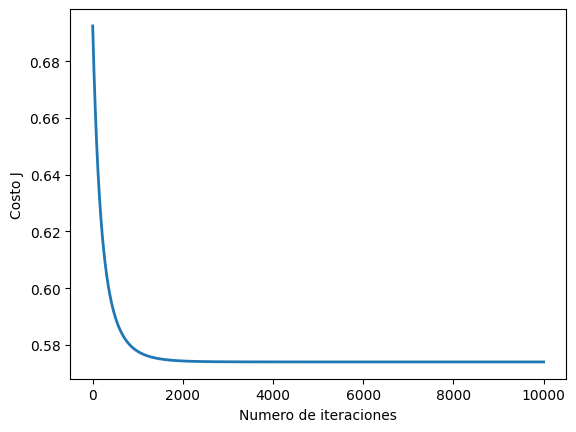

In [680]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(6)
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 1.0, 0.0, 0.0, 5.0, 0.0]
aprueba = sigmoid(np.dot(X_array, theta))

print('El resultado entre falso o verdadero es (usando el descenso por el gradiente):{:.0f}'.format(aprueba))

In [681]:
print(X_test.shape)

(705, 6)


In [682]:
m = X_test.shape[0]
print(m)

705


In [683]:
n=X_test.shape[1]
X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

In [684]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y_test.size  # numero de ejemplos de entrenamiento
    #Se define una pequeña cantidad epsilon para evitar problemas de logaritmo de cero en el cálculo de la función de costo
    epsilon = 1e-8

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X_test.dot(theta.T))

    J = (1 / m) * np.sum(-y_test.dot(np.log(h+epsilon)) - (1 - y_test).dot(np.log(1 - h+epsilon)))
    grad = (1 / m) * (h - y_test).dot(X_test)

    return J, grad

In [685]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Gradiente en theta inicial (zeros):')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(*grad))

[0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Gradiente en theta inicial (zeros):
	[-0.01, -0.01, -0.04,0.02, -2.58, -7.71, 0.23


In [686]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-0.5, 0.8, -1.2, 0.3, -0.7, 1.0, -1.5])

print(test_theta)
cost, grad = costFunction(test_theta, X_test, y_test)

print('Costo en theta prueba: {:.3f}'.format(cost))

print('Gradiente en theta prueba:')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(*grad))


[-0.5  0.8 -1.2  0.3 -0.7  1.  -1.5]
Costo en theta prueba: 6.604
Gradiente en theta prueba:
	[0.35, 0.35, 0.63,0.26, 32.85, 40.39, 3.14


In [687]:
print("Forma de X_test:", X_test.shape)


Forma de X_test: (705, 7)


In [688]:
print('Tamaño del gradiente:', len(grad))


Tamaño del gradiente: 7


In [689]:

# Esta línea define un diccionario options
# que contiene las opciones de configuración para el algoritmo de optimización
options= {'maxiter': 1000}

# En esta línea, se llama a la función optimize.minimize para encontrar
# el valor óptimo de los parámetros de ajuste (theta)
# costFunction: La función de costo que se desea minimizar.
# initial_theta: Los valores iniciales de los parámetros de ajuste.
# (X_test, y_test): Argumentos adicionales que se pasan a la función de costo.
# jac=True: Indica que la función de costo también devuelve el gradiente.
# method='TNC': Se utiliza el algoritmo de Newton truncado para la optimización.
# options=options: Las opciones de configuración para el algoritmo de optimización.
res = optimize.minimize(costFunction,initial_theta,(X_test, y_test),jac=True,method='TNC',options=options)

# Esta línea extrae el valor del costo óptimo del objeto res y lo guarda en la variable cost
cost = res.fun

# Esta línea extrae los valores óptimos de los parámetros de ajuste (theta) del objeto res y
# los guarda en la variable theta
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))


print('theta:')
print('\t[{:.2f}, {:.2f}, {:.2f},{:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(*theta))

Costo con un valor de theta encontrado por optimize.minimize: 0.584
theta:
	[-3.77, -3.77, 0.65,-0.25, 0.05, 0.02, -0.09


<ipython-input-689-2cab3f06a7e6>:13: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,initial_theta,(X_test, y_test),jac=True,method='TNC',options=options)


In [690]:
#X_test = np.concatenate([np.ones((m, 1)), X_test], axis=1)

In [691]:
def predict(theta, X_test):
    #devuelve el tamaño del primer eje de la matriz
    m = X_test.shape[0] # Numero de ejemplo de entrenamiento
    #Esta línea inicializa un vector p de tamaño m con ceros
    p = np.zeros(m)
    #Esta línea realiza las predicciones utilizando la función sigmoide y el producto punto entre X_test y theta.T
    p = np.round(sigmoid(X_test.dot(theta.T)))
    return p

In [692]:
print(X_test.shape)

(705, 7)


In [693]:
print(theta.shape)

(7,)


In [694]:
prob = sigmoid(np.dot([1, 1.0, 0.0, 0.0, 5.0, 0.0, 0.0], theta))
print('Con estos datos la prediccion es: {:.0f}'.format(prob))

p = predict(theta, X_test)
# Esta línea calcula la precisión en el conjunto de prueba comparando las predicciones p
# con las etiquetas reales y_test. La función np.mean(p == y_test) calcula la proporción
# de predicciones correctas, y se multiplica por 100 para obtener el porcentaje de precisión.
# La precisión se imprime utilizando el formato '{:.2f}' para mostrar dos decimales.
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_test) * 100))


Con estos datos la prediccion es: 0
Precisión de entrenamiento: 70.35 %
